In [1]:
import pandas as pd
df = pd.read_csv("F:\Autoatic grading system\EDM804.csv")

In [2]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
df["OUTPUT_LABEL"] = df.y == 1
df["OUTPUT_LABEL"] = df["OUTPUT_LABEL"].astype(int)
df.pop('y')
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,OUTPUT_LABEL
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [5]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return sum(y_actual) / len(y_actual)


print(
    "prevalence of the positive class: %.3f"
    % calc_prevalence(df["OUTPUT_LABEL"].values)
)

prevalence of the positive class: 0.200


In [6]:
print("# of Columns:", len(df.columns))

# of Columns: 179


In [7]:
collist = df.columns.tolist()
cols_input = collist[0:178]
df_data = df[cols_input + ["OUTPUT_LABEL"]]

In [8]:
# check for duplicated columns in cols_input
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "you have duplicated columns in cols_input"

set()


In [9]:
# check for duplicated columns in df_data
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'

set()


In [10]:
# check the size of df_data makes sense
assert (len(cols_input) + 1) == len(
    df_data.columns
), "issue with dimensions of df_data or cols_input"

In [11]:
df_data = df_data.sample(n=len(df_data))
df_data = df_data.reset_index(drop=True)

In [12]:
df_valid_test = df_data.sample(frac=0.3)
print("Validation/Test Split Size: %.1f" % (len(df_valid_test) / len(df_data)))

df_test = df_valid_test.sample(frac=0.5)
df_valid = df_valid_test.drop(df_test.index)

df_train_all = df_data.drop(df_valid_test.index)

Validation/Test Split Size: 0.3


In [13]:
# check the prevalence of each
print(
    "Test prevalence(n = %d):%.3f"
    % (len(df_test), calc_prevalence(df_test.OUTPUT_LABEL.values))
)
print(
    "Valid prevalence(n = %d):%.3f"
    % (len(df_valid), calc_prevalence(df_valid.OUTPUT_LABEL.values))
)
print(
    "Train all prevalence(n = %d):%.3f"
    % (len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values))
)

Test prevalence(n = 1725):0.210
Valid prevalence(n = 1725):0.201
Train all prevalence(n = 8050):0.198


In [14]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 11500)


In [15]:
import numpy as np

rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

n = np.min([len(df_train_pos), len(df_train_neg)])

df_train = pd.concat([df_train_pos.sample(n=n, random_state=69), df_train_neg.sample(n=n, random_state=69)], axis=0, ignore_index=True)

df_train = df_train.sample(n=len(df_train), random_state=69).reset_index(drop=True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 3182):0.500


In [16]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [17]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [18]:
# a function to fill missing values with mean of the column if needed
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [19]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

Training All shapes: (8050, 178)
Training shapes: (3182, 178) (3182,)
Validation shapes: (1725, 178) (1725,)


In [20]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [21]:
thresh = 0.5

In [22]:
####KNN####

import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_tf, y_train)

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.997
accuracy:0.878
recall:0.759
precision:0.996
specificity:0.997
prevalence:0.500
 
Validation:
AUC:0.934
accuracy:0.941
recall:0.731
precision:0.969
specificity:0.994
prevalence:0.201
 


In [24]:
####LOGISTIC REGRESSION####

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 69)
lr.fit(X_train_tf, y_train)

y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.625
accuracy:0.657
recall:0.534
precision:0.709
specificity:0.781
prevalence:0.500
 
Validation:
AUC:0.546
accuracy:0.690
recall:0.454
precision:0.312
specificity:0.749
prevalence:0.201
 


In [25]:
####Stochastic Gradient Descent####

from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss='log', alpha=0.1,  random_state= 42 )
sgdc.fit(X_train_tf, y_train)

y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descent')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall,  \
sgdc_train_precision,sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall,  \
sgdc_valid_precision,sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descent
Training:
AUC:0.572
accuracy:0.590
recall:0.517
precision:0.605
specificity:0.662
prevalence:0.500
 
Validation:
AUC:0.528
accuracy:0.615
recall:0.486
precision:0.257
specificity:0.648
prevalence:0.201
 


In [26]:
####NAIVE BAYES####
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_tf, y_train)

y_train_preds = gnb.predict_proba(X_train_tf)[:,1]
y_valid_preds = gnb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
gnb_train_auc, gnb_train_accuracy, gnb_train_recall,  \
gnb_train_precision,gnb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
gnb_valid_auc, gnb_valid_accuracy, gnb_valid_recall,  \
gnb_valid_precision,gnb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.984
accuracy:0.935
recall:0.899
precision:0.969
specificity:0.971
prevalence:0.500
 
Validation:
AUC:0.983
accuracy:0.951
recall:0.873
precision:0.880
specificity:0.970
prevalence:0.201
 


In [27]:
####DECISION TREE CLASSIFIER####

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 69)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=69, splitter='best')

In [28]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, \
tree_train_precision,tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, \
tree_valid_precision,tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.980
accuracy:0.975
recall:0.952
precision:0.997
specificity:0.996
prevalence:0.500
 
Validation:
AUC:0.862
accuracy:0.903
recall:0.824
precision:0.727
specificity:0.920
prevalence:0.201
 


In [29]:
####RANDOM FOREST####

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 6, random_state = 69)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, \
rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, \
rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.996
accuracy:0.958
recall:0.932
precision:0.982
specificity:0.983
prevalence:0.500
 
Validation:
AUC:0.983
accuracy:0.941
recall:0.893
precision:0.828
specificity:0.954
prevalence:0.201
 


In [30]:
####GRADIENT BOOSTING CLASSIFIER####

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=69)
gbc.fit(X_train_tf, y_train)

y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, \
gbc_train_precision,gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, \
gbc_valid_precision,gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.985
accuracy:0.947
recall:0.931
precision:0.826
specificity:0.951
prevalence:0.201
 


In [31]:
####Extremely Random Trees####

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [32]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)
etc.fit(X_train_tf, y_train)

y_train_preds = etc.predict_proba(X_train_tf)[:, 1]
y_valid_preds = etc.predict_proba(X_valid_tf)[:, 1]

print('Extra Trees Classifier')
print('Training:')
etc_train_auc, etc_train_accuracy, etc_train_recall, \
etc_train_precision,etc_train_specificity = print_report(y_train, y_train_preds, thresh)
print('Validation:')
etc_valid_auc, etc_valid_accuracy, etc_valid_recall, \
etc_valid_precision,etc_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Extra Trees Classifier
Training:
AUC:1.000
accuracy:0.998
recall:1.000
precision:0.996
specificity:0.996
prevalence:0.500
 
Validation:
AUC:0.991
accuracy:0.951
recall:0.945
precision:0.834
specificity:0.953
prevalence:0.201
 


In [33]:
####XGBoost Classifier####
import xgboost as xgb
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_tf, y_train)

y_train_preds = xgbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = xgbc.predict_proba(X_valid_tf)[:,1]

print('Xtreme Gradient Boosting Classifier')
print('Training:')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, \
xgbc_train_precision,xgbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, \
xgbc_valid_precision,xgbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Xtreme Gradient Boosting Classifier
Training:
AUC:0.999
accuracy:0.988
recall:0.983
precision:0.993
specificity:0.993
prevalence:0.500
 
Validation:
AUC:0.988
accuracy:0.955
recall:0.916
precision:0.866
specificity:0.964
prevalence:0.201
 


In [34]:
#ANN or MLP#
#Making the NN

#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing the NN
classifier = Sequential()
#Adding input layer and first hidden layer
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = 178))
#Adding second hidden layer
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))
#Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)


Using TensorFlow backend.


Epoch 1/100
3182/3182 [==============================] - 4s 1ms/step - loss: 0.4735 - acc: 0.7077
Epoch 2/100
3182/3182 [==============================] - 1s 300us/step - loss: 0.3604 - acc: 0.8228
Epoch 3/100
3182/3182 [==============================] - 1s 324us/step - loss: 0.3108 - acc: 0.8878
Epoch 4/100
3182/3182 [==============================] - 1s 304us/step - loss: 0.2761 - acc: 0.9167
Epoch 5/100
3182/3182 [==============================] - 1s 309us/step - loss: 0.2420 - acc: 0.9287
Epoch 6/100
3182/3182 [==============================] - 1s 327us/step - loss: 0.2103 - acc: 0.9503
Epoch 7/100
3182/3182 [==============================] - 1s 309us/step - loss: 0.2101 - acc: 0.9431
Epoch 8/100
3182/3182 [==============================] - 1s 304us/step - loss: 0.1716 - acc: 0.9525
Epoch 9/100
3182/3182 [==============================] - 1s 295us/step - loss: 0.1534 - acc: 0.9585
Epoch 10/100
3182/3182 [==============================] - 1s 294us/step - loss: 0.1301 - acc: 0.9711
E

In [35]:
from pylab import *
#y_train_preds = classifier.predict_proba(X_train_tf)[:,1]
#y_valid_preds = classifier.predict_proba(X_valid_tf)[:,1]

print('ANN Classifier')
print('Training:')
classifier_train_auc, classifier_train_accuracy, classifier_train_recall, \
classifier_train_precision, classifier_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
classifier_valid_auc, classifier_valid_accuracy, classifier_valid_recall, \
classifier_valid_precision,classifier_valid_specificity = print_report(y_valid,y_valid_preds, thresh)


ANN Classifier
Training:
AUC:0.999
accuracy:0.988
recall:0.983
precision:0.993
specificity:0.993
prevalence:0.500
 
Validation:
AUC:0.988
accuracy:0.955
recall:0.916
precision:0.866
specificity:0.964
prevalence:0.201
 


In [36]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB','XGBC','XGBC','ETC','ETC','ANN','ANN'],'data_set':['train','valid']*10,'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,gnb_train_auc,gnb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,xgbc_train_auc,xgbc_valid_auc,etc_train_auc,etc_valid_auc,classifier_train_auc,classifier_valid_auc],'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,gnb_train_accuracy,gnb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,xgbc_train_accuracy,xgbc_valid_accuracy,etc_train_accuracy,etc_valid_accuracy,classifier_train_accuracy,classifier_valid_accuracy],'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,gnb_train_recall,gnb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,xgbc_train_recall,xgbc_valid_recall,etc_train_recall,etc_valid_recall,classifier_train_recall,classifier_valid_recall],'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,gnb_train_precision,gnb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,xgbc_train_precision,xgbc_valid_precision,etc_train_precision,etc_valid_precision,classifier_train_precision,classifier_valid_precision],'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,gnb_train_specificity,gnb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,xgbc_train_specificity,xgbc_valid_specificity,etc_train_specificity,etc_valid_specificity,classifier_train_specificity,classifier_valid_specificity]})

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
sns.set(style="whitegrid")

Text(0.5, 1.0, 'Group Barchart of different Classifiers')

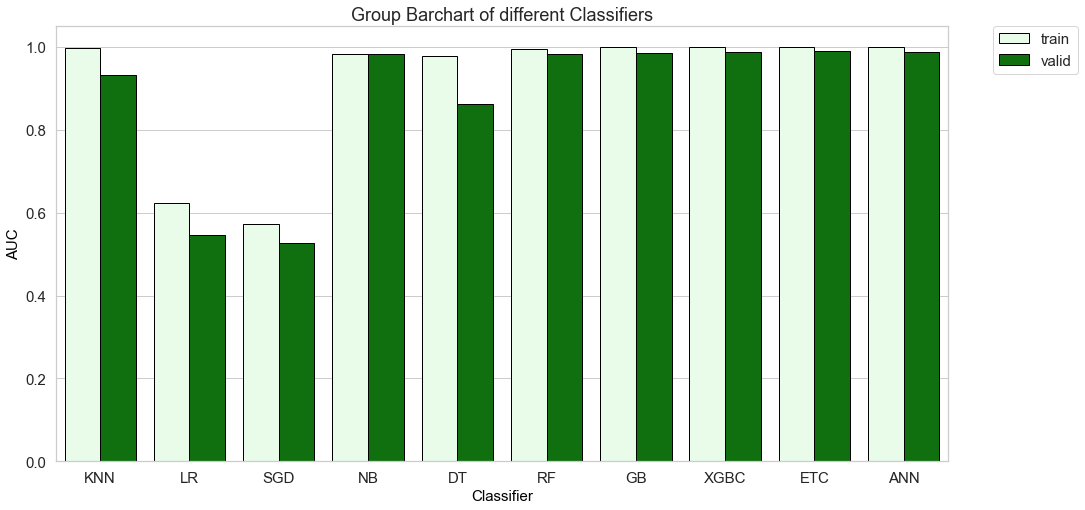

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'auc',color='green',edgecolor='black', hue = 'data_set', data = df_results )
ax.set_xlabel('Classifier', fontsize = 15, color = 'black')
ax.set_ylabel('AUC', fontsize = 15, color = 'black')
ax.tick_params(labelsize = 15)
#plt.bar(x = 'classifier', y = 'auc',color='pink',edgecolor='black')
#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)
plt.title('Group Barchart of different Classifiers',fontsize=18)

In [39]:
# this is a quick way to tune one parameter of your model while holding everything else constant.
import time

my_params =  np.arange(0.05, 1.01, 0.05) # fill this in your list of parameters

# initialize arrays for storing the results
train_metrics = np.zeros(len(my_params))
valid_metrics = np.zeros(len(my_params))

# train a model for each param in a list
t1 = time.time()
for jj in range(len(my_params)):
    my_param = my_params[jj]
    
    # fit model
    model = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=my_param, min_samples_leaf=3, min_samples_split=20, n_estimators=100)
    model.fit(X_train_tf, y_train)
    # get predictions
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    metric_train = roc_auc_score(y_train, y_train_preds) # fill this in
    metric_valid = roc_auc_score(y_valid, y_valid_preds) # fill this in

    # save aucs
    train_metrics[jj] = metric_train
    valid_metrics[jj] = metric_valid
    
    # print the time
    t2 = time.time()
    print(my_param, t2-t1)
    t1 = time.time()

0.05 1.5919818878173828
0.1 2.6459643840789795
0.15000000000000002 3.9079530239105225
0.2 4.552940607070923
0.25 4.6971354484558105
0.3 4.651457786560059
0.35000000000000003 4.812819957733154
0.4 4.941178798675537
0.45 5.42980170249939
0.5 5.99255895614624
0.55 6.505203723907471
0.6000000000000001 7.016411304473877
0.6500000000000001 7.510601758956909
0.7000000000000001 8.175639390945435
0.7500000000000001 8.646686792373657
0.8 9.381540775299072
0.8500000000000001 9.833306074142456
0.9000000000000001 10.372663259506226
0.9500000000000001 10.59938645362854
1.0 11.474317073822021


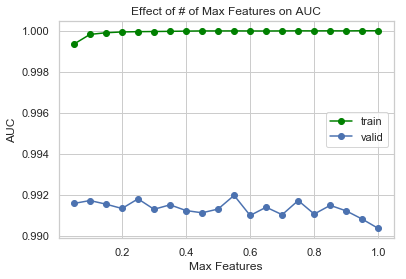

In [40]:
import matplotlib.pyplot as plt

plt.plot(my_params, train_metrics,'o-',label = 'train',color='green')
plt.plot(my_params, valid_metrics,'o-',label = 'valid')

plt.xlabel('Max Features') # fill this in
plt.ylabel('AUC')# fill this in
plt.title('Effect of # of Max Features on AUC') # fill this in
plt.legend()
plt.show()

In [41]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    
    plt.figure(figsize=(16, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="orange",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="blue",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

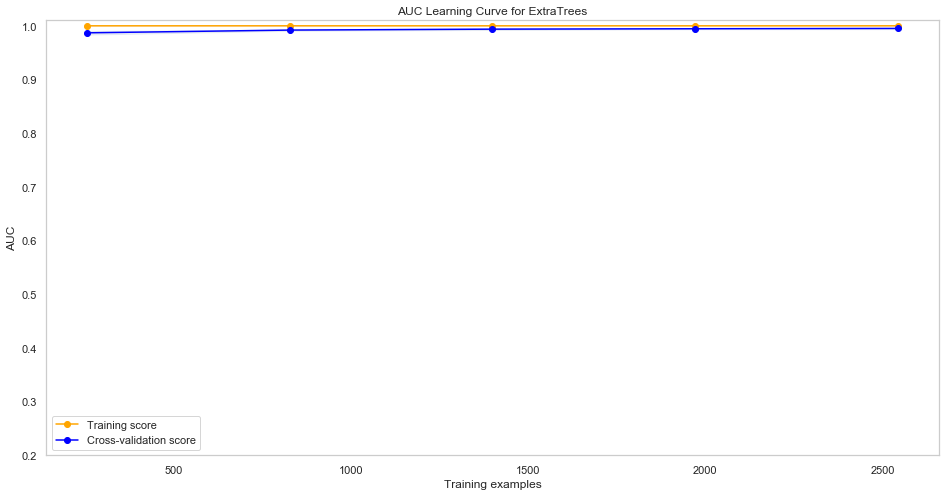

In [42]:
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.


title = 'AUC Learning Curve for ExtraTrees'                                      # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0, min_samples_leaf=3, min_samples_split=20, n_estimators=100)                                      # fill this in
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)


plt.show()

In [43]:
####TPOT Library ####
feature_importances = pd.DataFrame(etc.feature_importances_,index = cols_input,columns=['importance']).sort_values('importance',ascending=False)

In [44]:
feature_importances.head()

,importance
X156,0.019239
X92,0.017527
X13,0.017522
X157,0.017504
X107,0.015872


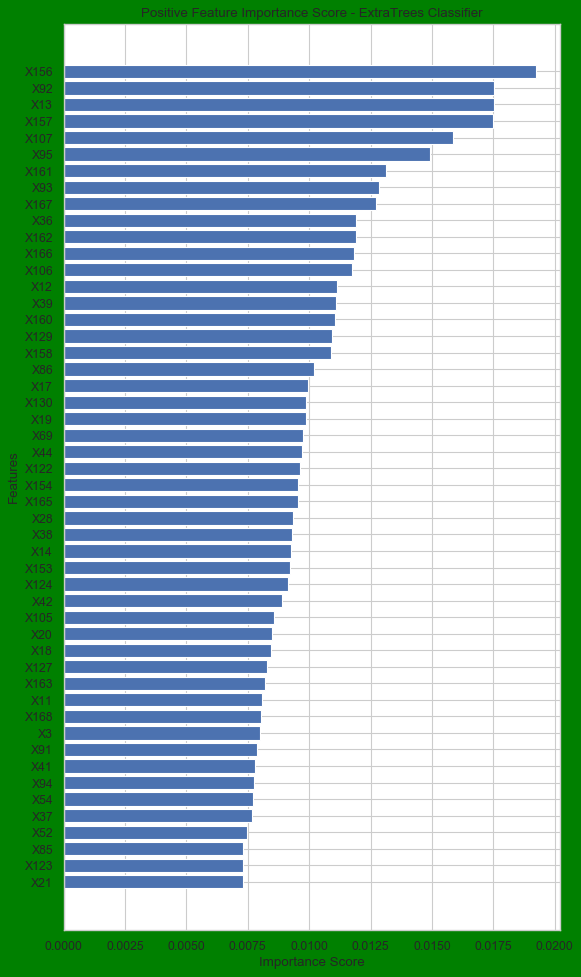

In [45]:
pos_features = feature_importances.loc[feature_importances.importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='green', edgecolor='black');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - ExtraTrees Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

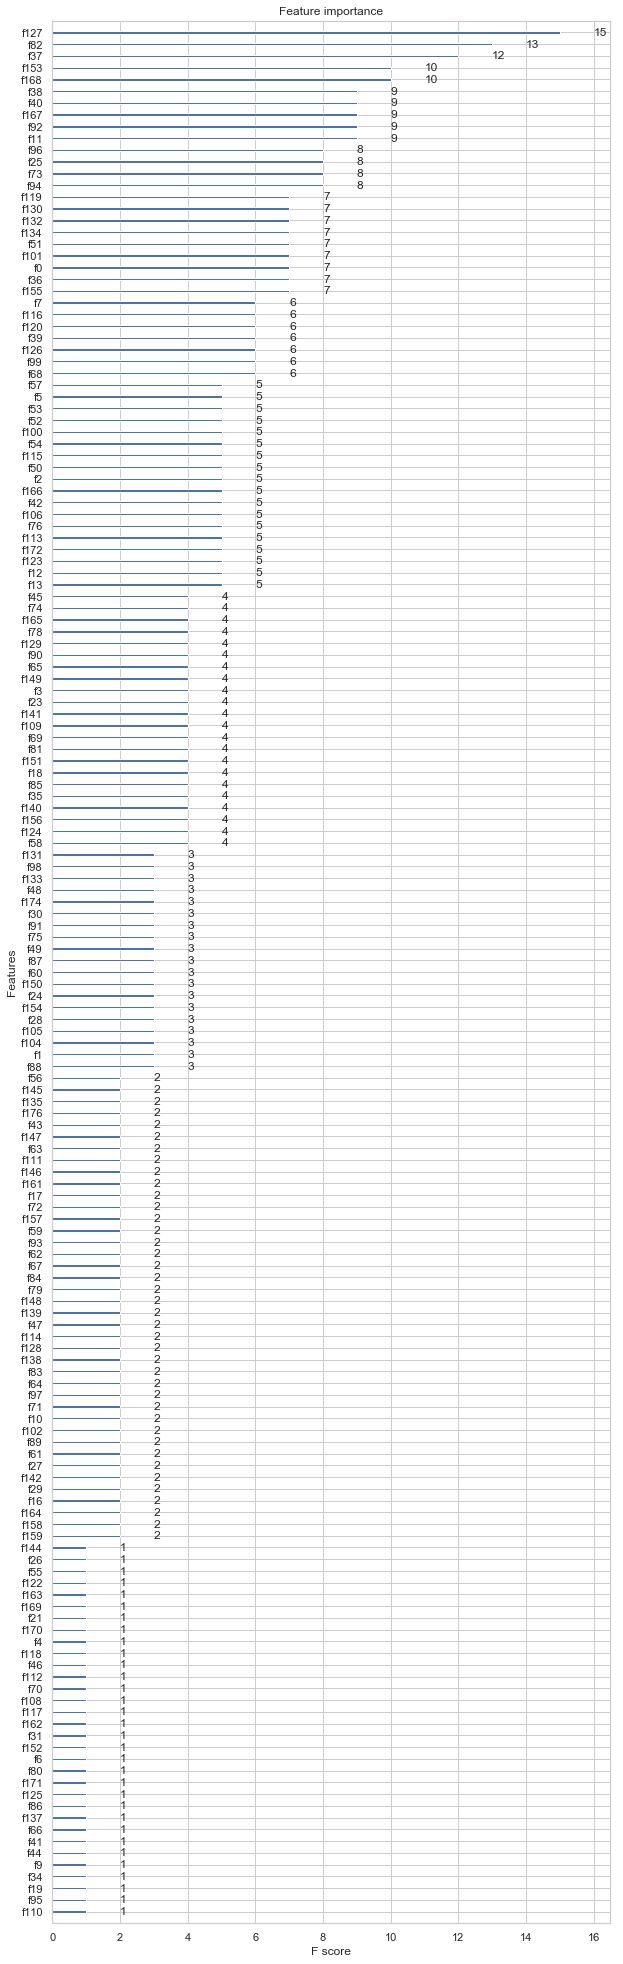

In [46]:
ax = xgb.plot_importance(xgbc)
fig = ax.figure
fig.set_size_inches(10, 35)
plt.savefig('xgbcf.png')

In [47]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X = df_train.drop(columns=['OUTPUT_LABEL'])
model = xgbc

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

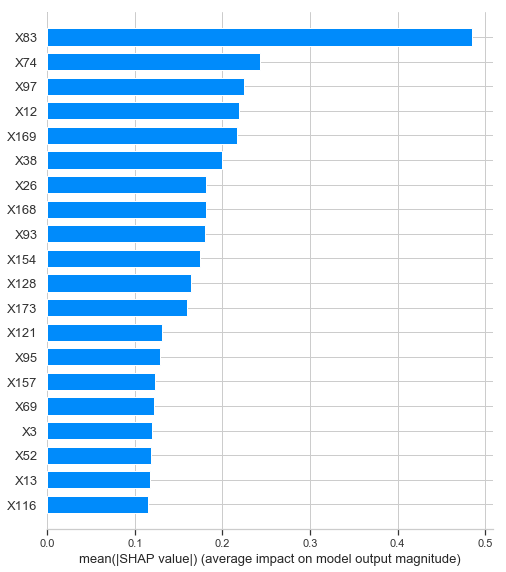

<Figure size 432x288 with 0 Axes>

In [48]:
shap.summary_plot(shap_values, X, plot_type="bar")
plt.savefig('shap.png')

In [49]:
feature_importances = pd.DataFrame(xgbc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

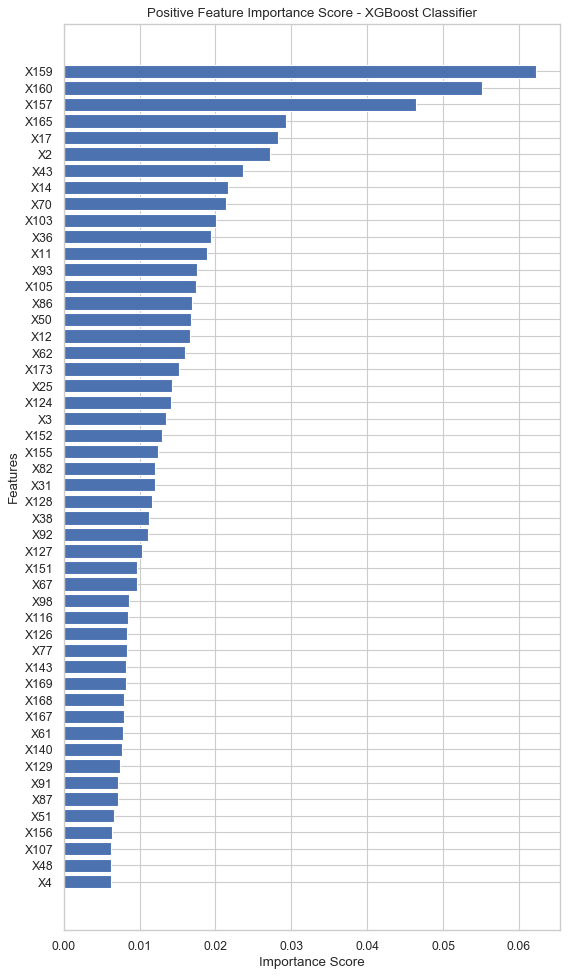

In [50]:
pos_features = feature_importances.loc[feature_importances.importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - XGBoost Classifier')
plt.yticks(ylocs, feature_labels)
plt.savefig('xgbc.png')
plt.show()

In [51]:
###HYPERPARAETER####
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:52072 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 2 Memory: 3.73 GB


In [52]:
from tpot import TPOTClassifier
import numpy as np
tpot_config = {
    'xgboost.XGBClassifier': {
        'n_estimators': [100],
        'max_depth': range(1, 11),
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'subsample': np.arange(0.05, 1.01, 0.05),
        'min_child_weight': range(1, 21),
        'nthread': [1]
    },
    'sklearn.ensemble.ExtraTreesClassifier': {
        'n_estimators': [100],
        'criterion': ["gini", "entropy"],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'bootstrap': [True, False]
    }

}
pipeline_optimizer = TPOTClassifier(verbosity=2, periodic_checkpoint_folder='tpot', generations=100, population_size=100, scoring='roc_auc', use_dask=True, config_dict=tpot_config)
pipeline_optimizer.fit(X_train_tf, y_train)
print(pipeline_optimizer.score(X_valid, y_valid))
pipeline_optimizer.export('tpot_exported_pipeline.py')

RuntimeError: A pipeline has not yet been optimized. Please call fit() first.

In [53]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy

In [54]:
best_model = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        make_union(
            make_union(
                FunctionTransformer(copy),
                make_union(
                    FunctionTransformer(copy),
                    make_union(
                        StackingEstimator(estimator=make_pipeline(
                            make_union(
                                FunctionTransformer(copy),
                                FunctionTransformer(copy)
                            ),
                            ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.1,
                                                 min_samples_leaf=10, min_samples_split=10, n_estimators=100)
                        )),
                        FunctionTransformer(copy)
                    )
                )
            ),
            FunctionTransformer(copy)
        )
    ),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.05,
                         min_samples_leaf=2, min_samples_split=4, n_estimators=100)
)

best_model.fit(X_train_tf, y_train)

y_train_preds = best_model.predict_proba(X_train_tf)[:, 1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:, 1]

print('ExtraTrees Classifier')
print('Training:')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(
    y_train, y_train_preds, thresh)
print('Validation:')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(
    y_valid, y_valid_preds, thresh)

ExtraTrees Classifier
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.992
accuracy:0.953
recall:0.939
precision:0.844
specificity:0.956
prevalence:0.201
 


In [55]:
pickle.dump(best_model, open('best_classifier.pkl', 'wb'),protocol = 4)

In [56]:
####MODEL EVALUATION####

# load the model, columns, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
scaler = pickle.load(open('scaler.sav', 'rb'))

# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [57]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [58]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.992
accuracy:0.953
recall:0.939
precision:0.844
specificity:0.956
prevalence:0.201
 
Test:
AUC:0.995
accuracy:0.964
recall:0.970
precision:0.873
specificity:0.963
prevalence:0.210
 


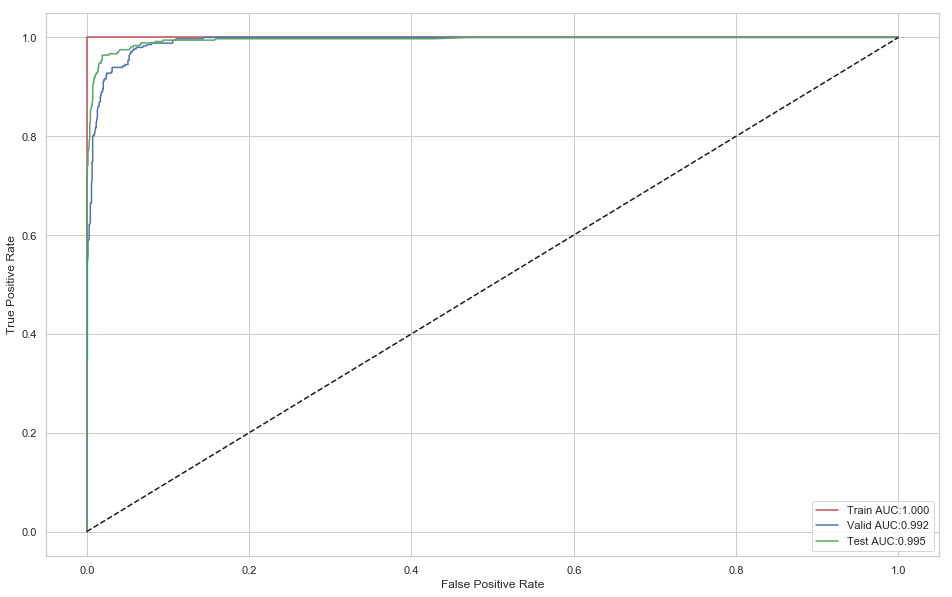

In [59]:
###ROC CURVE###
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

EXTRA